In [1]:
from keras import optimizers, regularizers
from keras.layers import Dense, Dropout, Input
from keras.models import Model, Sequential
from random import shuffle
from scipy import interp
from scipy.stats.mstats import gmean
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import QuantileTransformer
import contextlib
import glob
import gzip
import h5py
import keras
import numpy as np
import os
import pandas as pd
import pylab as plt
import random
import scipy
import sklearn
import tensorflow as tf
random_state = np.random.RandomState(0)

Using TensorFlow backend.


In [2]:
X_f = '/home/drewe/notebooks/genotox/GenoTox-database.csv'
y_f = '/home/drewe/notebooks/genotox/outcome-mod-2.csv'

X = pd.read_csv(X_f).values[:,:-1]
y = pd.read_csv(y_f).values


ix = [i for i in range(y.shape[0])]
shuffle(ix)
X  = X[ix, :]
y = y[ix]
names = pd.read_csv(X_f)['Unnamed: 0'][ix].values
X = sklearn.preprocessing.quantile_transform(X, axis=1, output_distribution='uniform', copy=True)
y = y[: ,0]



In [3]:
y

array([0, 1, 1, ..., 1, 1, 0])

>>
.
Epoch 1/50
7271/7271 [==============================] - 0s 37us/step - loss: 0.5932 - acc: 0.6739
Epoch 2/50
7271/7271 [==============================] - 0s 34us/step - loss: 0.5952 - acc: 0.6707
Epoch 3/50
7271/7271 [==============================] - 0s 33us/step - loss: 0.5905 - acc: 0.6805
Epoch 4/50
7271/7271 [==============================] - 0s 33us/step - loss: 0.5894 - acc: 0.6732
Epoch 5/50
7271/7271 [==============================] - 0s 33us/step - loss: 0.5918 - acc: 0.6767
Epoch 6/50
7271/7271 [==============================] - 0s 33us/step - loss: 0.5923 - acc: 0.6768
Epoch 7/50
7271/7271 [==============================] - 0s 33us/step - loss: 0.5880 - acc: 0.6749
Epoch 8/50
7271/7271 [==============================] - 0s 34us/step - loss: 0.5861 - acc: 0.6779
Epoch 9/50
7271/7271 [==============================] - 0s 33us/step - loss: 0.5802 - acc: 0.6871
Epoch 10/50
7271/7271 [==============================] - 0s 33us/step - loss: 0.5892 - acc: 0.6734
Epoch 11/50
72

Epoch 16/50
7271/7271 [==============================] - 0s 38us/step - loss: 0.5859 - acc: 0.6754
Epoch 17/50
7271/7271 [==============================] - 0s 36us/step - loss: 0.5806 - acc: 0.6813
Epoch 18/50
7271/7271 [==============================] - 0s 36us/step - loss: 0.5859 - acc: 0.6771
Epoch 19/50
7271/7271 [==============================] - 0s 39us/step - loss: 0.5817 - acc: 0.6747
Epoch 20/50
7271/7271 [==============================] - 0s 36us/step - loss: 0.5789 - acc: 0.6775
Epoch 21/50
7271/7271 [==============================] - 0s 36us/step - loss: 0.5793 - acc: 0.6764
Epoch 22/50
7271/7271 [==============================] - 0s 36us/step - loss: 0.5759 - acc: 0.6841
Epoch 23/50
7271/7271 [==============================] - 0s 37us/step - loss: 0.5716 - acc: 0.6855
Epoch 24/50
7271/7271 [==============================] - 0s 37us/step - loss: 0.5720 - acc: 0.6873
Epoch 25/50
7271/7271 [==============================] - 0s 36us/step - loss: 0.5727 - acc: 0.6805
Epoch 26/5

7271/7271 [==============================] - 0s 37us/step - loss: 0.5462 - acc: 0.7079
Epoch 31/50
7271/7271 [==============================] - 0s 37us/step - loss: 0.5516 - acc: 0.7053
Epoch 32/50
7271/7271 [==============================] - 0s 42us/step - loss: 0.5544 - acc: 0.6977
Epoch 33/50
7271/7271 [==============================] - 0s 38us/step - loss: 0.5404 - acc: 0.7106
Epoch 34/50
7271/7271 [==============================] - 0s 38us/step - loss: 0.5473 - acc: 0.7054
Epoch 35/50
7271/7271 [==============================] - 0s 38us/step - loss: 0.5417 - acc: 0.7143
Epoch 36/50
7271/7271 [==============================] - 0s 38us/step - loss: 0.5470 - acc: 0.7105
Epoch 37/50
7271/7271 [==============================] - 0s 37us/step - loss: 0.5337 - acc: 0.7163
Epoch 38/50
7271/7271 [==============================] - 0s 37us/step - loss: 0.5350 - acc: 0.7170
Epoch 39/50
7271/7271 [==============================] - 0s 36us/step - loss: 0.5300 - acc: 0.7248
Epoch 40/50
7271/7271 

Epoch 13/50
7271/7271 [==============================] - 0s 36us/step - loss: 0.5806 - acc: 0.6841
Epoch 14/50
7271/7271 [==============================] - 0s 36us/step - loss: 0.5787 - acc: 0.6842
Epoch 15/50
7271/7271 [==============================] - 0s 39us/step - loss: 0.5725 - acc: 0.6940
Epoch 16/50
7271/7271 [==============================] - 0s 41us/step - loss: 0.5732 - acc: 0.6915
Epoch 17/50
7271/7271 [==============================] - 0s 48us/step - loss: 0.5763 - acc: 0.6833
Epoch 18/50
7271/7271 [==============================] - 0s 51us/step - loss: 0.5720 - acc: 0.6911
Epoch 19/50
7271/7271 [==============================] - 0s 47us/step - loss: 0.5672 - acc: 0.6947
Epoch 20/50
7271/7271 [==============================] - 0s 48us/step - loss: 0.5657 - acc: 0.6926
Epoch 21/50
7271/7271 [==============================] - 0s 38us/step - loss: 0.5656 - acc: 0.6984
Epoch 22/50
7271/7271 [==============================] - 0s 36us/step - loss: 0.5646 - acc: 0.6952
Epoch 23/5

7272/7272 [==============================] - 0s 39us/step - loss: 0.5785 - acc: 0.6844
Epoch 28/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5789 - acc: 0.6899
Epoch 29/50
7272/7272 [==============================] - 0s 39us/step - loss: 0.5699 - acc: 0.6940
Epoch 30/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5761 - acc: 0.6887
Epoch 31/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5727 - acc: 0.6983
Epoch 32/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5733 - acc: 0.6929
Epoch 33/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.5646 - acc: 0.6977
Epoch 34/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5759 - acc: 0.6954
Epoch 35/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5626 - acc: 0.7017
Epoch 36/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5700 - acc: 0.6965
Epoch 37/50
7272/7272 

Epoch 10/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5999 - acc: 0.6650
Epoch 11/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5989 - acc: 0.6591
Epoch 12/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.6051 - acc: 0.6676
Epoch 13/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5967 - acc: 0.6682
Epoch 14/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5956 - acc: 0.6687
Epoch 15/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5981 - acc: 0.6741
Epoch 16/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5956 - acc: 0.6749
Epoch 17/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5916 - acc: 0.6800
Epoch 18/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5994 - acc: 0.6687
Epoch 19/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5930 - acc: 0.6740
Epoch 20/5

7272/7272 [==============================] - 0s 38us/step - loss: 0.5785 - acc: 0.6819
Epoch 25/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.5755 - acc: 0.6800
Epoch 26/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.5901 - acc: 0.6715
Epoch 27/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5744 - acc: 0.6833
Epoch 28/50
7272/7272 [==============================] - 0s 35us/step - loss: 0.5739 - acc: 0.6803
Epoch 29/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5735 - acc: 0.6784
Epoch 30/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.5751 - acc: 0.6786
Epoch 31/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.5741 - acc: 0.6822
Epoch 32/50
7272/7272 [==============================] - 0s 39us/step - loss: 0.5741 - acc: 0.6841
Epoch 33/50
7272/7272 [==============================] - 0s 39us/step - loss: 0.5706 - acc: 0.6832
Epoch 34/50
7272/7272 

Epoch 39/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5784 - acc: 0.6812
Epoch 40/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5720 - acc: 0.6872
Epoch 41/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5690 - acc: 0.6878
Epoch 42/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5745 - acc: 0.6806
Epoch 43/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5655 - acc: 0.6931
Epoch 44/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5699 - acc: 0.6883
Epoch 45/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5655 - acc: 0.6962
Epoch 46/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5651 - acc: 0.6906
Epoch 47/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5631 - acc: 0.6936
Epoch 48/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5659 - acc: 0.6863
Epoch 49/5

7272/7272 [==============================] - 0s 36us/step - loss: 0.5834 - acc: 0.6784
Epoch 4/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5836 - acc: 0.6815
Epoch 5/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5803 - acc: 0.6830
Epoch 6/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5829 - acc: 0.6815
Epoch 7/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5729 - acc: 0.6913
Epoch 8/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.5745 - acc: 0.6920
Epoch 9/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5774 - acc: 0.6873
Epoch 10/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5703 - acc: 0.6922
Epoch 11/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5730 - acc: 0.6843
Epoch 12/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5708 - acc: 0.6942
Epoch 13/50
7272/7272 [=====

Epoch 36/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5915 - acc: 0.6653
Epoch 37/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5853 - acc: 0.6778
Epoch 38/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5844 - acc: 0.6756
Epoch 39/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5760 - acc: 0.6786
Epoch 40/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.5805 - acc: 0.6790
Epoch 41/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5878 - acc: 0.6724
Epoch 42/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5777 - acc: 0.6821
Epoch 43/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5808 - acc: 0.6766
Epoch 44/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5770 - acc: 0.6833
Epoch 45/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5721 - acc: 0.6839
Epoch 46/5

7272/7272 [==============================] - 0s 36us/step - loss: 0.5382 - acc: 0.7200
>>
.
Epoch 1/50
7272/7272 [==============================] - 0s 35us/step - loss: 0.5863 - acc: 0.6789
Epoch 2/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5917 - acc: 0.6737
Epoch 3/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5874 - acc: 0.6698
Epoch 4/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5896 - acc: 0.6764
Epoch 5/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5824 - acc: 0.6834
Epoch 6/50
7272/7272 [==============================] - 0s 35us/step - loss: 0.5775 - acc: 0.6878
Epoch 7/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5787 - acc: 0.6837
Epoch 8/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5763 - acc: 0.6844
Epoch 9/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5742 - acc: 0.6885
Epoch 10/50
7272/7272 [===

Epoch 33/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5910 - acc: 0.6675
Epoch 34/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5880 - acc: 0.6647
Epoch 35/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5870 - acc: 0.6679
Epoch 36/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5891 - acc: 0.6671
Epoch 37/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5913 - acc: 0.6683
Epoch 38/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5821 - acc: 0.6683
Epoch 39/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5860 - acc: 0.6664
Epoch 40/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5874 - acc: 0.6661
Epoch 41/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5811 - acc: 0.6716
Epoch 42/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5831 - acc: 0.6658
Epoch 43/5

7272/7272 [==============================] - 0s 37us/step - loss: 0.5453 - acc: 0.7063
Epoch 48/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5496 - acc: 0.7045
Epoch 49/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5524 - acc: 0.6942
Epoch 50/50
7272/7272 [==============================] - 0s 35us/step - loss: 0.5351 - acc: 0.7067
>>
.
Epoch 1/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5947 - acc: 0.6617
Epoch 2/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5909 - acc: 0.6641
Epoch 3/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5976 - acc: 0.6592
Epoch 4/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5932 - acc: 0.6658
Epoch 5/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5912 - acc: 0.6639
Epoch 6/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5870 - acc: 0.6686
Epoch 7/50
7272/7272 [=

Epoch 30/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5932 - acc: 0.6652
Epoch 31/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5803 - acc: 0.6784
Epoch 32/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5817 - acc: 0.6823
Epoch 33/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5771 - acc: 0.6786
Epoch 34/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5736 - acc: 0.6841
Epoch 35/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5710 - acc: 0.6828
Epoch 36/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.5740 - acc: 0.6859
Epoch 37/50
7272/7272 [==============================] - 0s 40us/step - loss: 0.5757 - acc: 0.6823
Epoch 38/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5687 - acc: 0.6898
Epoch 39/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.5721 - acc: 0.6804
Epoch 40/5

7272/7272 [==============================] - 0s 36us/step - loss: 0.5558 - acc: 0.7093
Epoch 45/50
7272/7272 [==============================] - 0s 35us/step - loss: 0.5667 - acc: 0.6969
Epoch 46/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5569 - acc: 0.7052
Epoch 47/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5548 - acc: 0.7087
Epoch 48/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5542 - acc: 0.7075
Epoch 49/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5560 - acc: 0.7060
Epoch 50/50
7272/7272 [==============================] - 0s 35us/step - loss: 0.5519 - acc: 0.7067
>>
.
Epoch 1/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.6114 - acc: 0.6608
Epoch 2/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5999 - acc: 0.6652
Epoch 3/50
7272/7272 [==============================] - 0s 35us/step - loss: 0.6010 - acc: 0.6650
Epoch 4/50
7272/7272

Epoch 27/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5585 - acc: 0.7038
Epoch 28/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5591 - acc: 0.7042
Epoch 29/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.5553 - acc: 0.7130
Epoch 30/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5596 - acc: 0.7060
Epoch 31/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5589 - acc: 0.7085
Epoch 32/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5519 - acc: 0.7081
Epoch 33/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5480 - acc: 0.7116
Epoch 34/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5509 - acc: 0.7131
Epoch 35/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.5497 - acc: 0.7101
Epoch 36/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.5566 - acc: 0.7130
Epoch 37/5

7273/7273 [==============================] - 0s 35us/step - loss: 0.5350 - acc: 0.7206
Epoch 42/50
7273/7273 [==============================] - 0s 36us/step - loss: 0.5404 - acc: 0.7190
Epoch 43/50
7273/7273 [==============================] - 0s 35us/step - loss: 0.5450 - acc: 0.7168
Epoch 44/50
7273/7273 [==============================] - 0s 37us/step - loss: 0.5393 - acc: 0.7210
Epoch 45/50
7273/7273 [==============================] - 0s 35us/step - loss: 0.5344 - acc: 0.7203
Epoch 46/50
7273/7273 [==============================] - 0s 35us/step - loss: 0.5310 - acc: 0.7271
Epoch 47/50
7273/7273 [==============================] - 0s 36us/step - loss: 0.5336 - acc: 0.7183
Epoch 48/50
7273/7273 [==============================] - 0s 36us/step - loss: 0.5312 - acc: 0.7216
Epoch 49/50
7273/7273 [==============================] - 0s 37us/step - loss: 0.5337 - acc: 0.7220
Epoch 50/50
7273/7273 [==============================] - 0s 37us/step - loss: 0.5268 - acc: 0.7306
>>
.
Epoch 1/50
7273/7

Epoch 24/50
7273/7273 [==============================] - 0s 37us/step - loss: 0.5794 - acc: 0.6820
Epoch 25/50
7273/7273 [==============================] - 0s 37us/step - loss: 0.5777 - acc: 0.6831
Epoch 26/50
7273/7273 [==============================] - 0s 36us/step - loss: 0.5759 - acc: 0.6829
Epoch 27/50
7273/7273 [==============================] - 0s 36us/step - loss: 0.5748 - acc: 0.6814
Epoch 28/50
7273/7273 [==============================] - 0s 37us/step - loss: 0.5713 - acc: 0.6861
Epoch 29/50
7273/7273 [==============================] - 0s 36us/step - loss: 0.5733 - acc: 0.6876
Epoch 30/50
7273/7273 [==============================] - 0s 37us/step - loss: 0.5728 - acc: 0.6893
Epoch 31/50
7273/7273 [==============================] - 0s 37us/step - loss: 0.5725 - acc: 0.6868
Epoch 32/50
7273/7273 [==============================] - 0s 37us/step - loss: 0.5691 - acc: 0.6916
Epoch 33/50
7273/7273 [==============================] - 0s 36us/step - loss: 0.5599 - acc: 0.6938
Epoch 34/5

Epoch 39/50
7273/7273 [==============================] - 0s 36us/step - loss: 0.5629 - acc: 0.6970
Epoch 40/50
7273/7273 [==============================] - 0s 36us/step - loss: 0.5566 - acc: 0.7034
Epoch 41/50
7273/7273 [==============================] - 0s 36us/step - loss: 0.5588 - acc: 0.6967
Epoch 42/50
7273/7273 [==============================] - 0s 36us/step - loss: 0.5583 - acc: 0.6972
Epoch 43/50
7273/7273 [==============================] - 0s 36us/step - loss: 0.5583 - acc: 0.6994
Epoch 44/50
7273/7273 [==============================] - 0s 36us/step - loss: 0.5488 - acc: 0.7078
Epoch 45/50
7273/7273 [==============================] - 0s 38us/step - loss: 0.5542 - acc: 0.7029
Epoch 46/50
7273/7273 [==============================] - 0s 37us/step - loss: 0.5540 - acc: 0.7056
Epoch 47/50
7273/7273 [==============================] - 0s 36us/step - loss: 0.5488 - acc: 0.7108
Epoch 48/50
7273/7273 [==============================] - 0s 37us/step - loss: 0.5529 - acc: 0.7030
Epoch 49/5

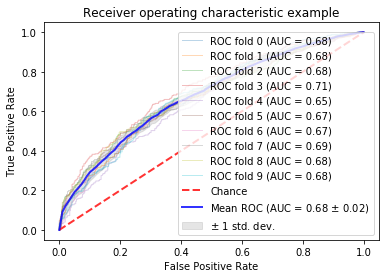

array([0.44792596, 0.69121736, 0.4685978 , ..., 0.83220756, 0.48728314,
       0.46735853])

In [4]:
cv = StratifiedKFold(n_splits=10)
results = np.zeros_like(y, dtype=float)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    keras.backend.clear_session()
    prbs=[]
    for mod in range(5):
        print('>>')
        curr_try = 0
        while curr_try <10:
            print('.')

            model = Sequential()
            model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
            model.add(Dense(64, activation='relu'))
            model.add(Dense(64, activation='relu'))
            model.add(Dense(64, activation='relu'))
            model.add(Dense(1, activation='sigmoid'))
            # Compile model
            opt = keras.optimizers.Adam(epsilon=None, amsgrad=True)
            model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
            
            # Fit the model
            history = model.fit(X[train,:], y[train], epochs=50, batch_size=64, verbose=0)
            if history.history['acc'][-1] > 0.53:
                break
            else:
                curr_try += 1

        # Fit the model
        model.fit(X[train,:], y[train], epochs=50, batch_size=64, verbose=1)
        
        # evaluate the model
        probas_ = model.predict(X[test,:])
        prbs.append(probas_)
    # Average the predictions
    probas_ = np.mean(np.hstack(prbs), axis=1)
    results[test] = probas_
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[ :])
    print('   ' + str(auc(fpr, tpr)))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
results

In [5]:
df_results = pd.DataFrame(data={"name": names, 'pred': results})
df_results.to_csv('/home/drewe/notebooks/genotox/pred.csv', index=None)

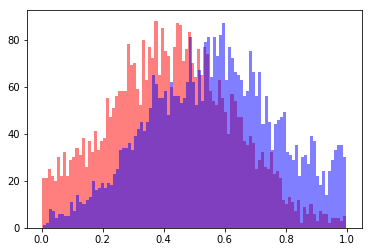

In [6]:
plt.hist(results[y==0],100, color='red', alpha=0.5)
plt.hist(results[y==1],100, color='blue', alpha=0.5)
plt.show()

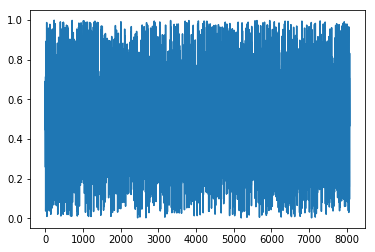

In [7]:
results[test] = probas_
plt.plot(results)